<a href="https://colab.research.google.com/github/itswwong/csm148-project/blob/main/CS148_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Set Explanation

Our team selected the Sleep Health and Lifestyle Dataset, which contains information about individuals’ demographics, daily habits, physical health, and sleep patterns.

## 2. Main Features

We are studying how Stress, Activity, Steps, HR, BP, BMI, Age, Gender, and Occupation affect Quality of Sleep.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

df = pd.read_csv('data/dataset.csv')

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 3. Data Cleaning

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Check for duplicate rows
duplicates = df.duplicated().sum()

In [3]:
# Replace "Normal Weight" with "Normal" in the original dataset
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [4]:
# Create copy for cleaning
df_clean = df.copy()

# Split blood pressure into systolic and diastolic
bp_split = df_clean['Blood Pressure'].str.split('/', expand=True)
df_clean['Systolic_BP'] = pd.to_numeric(bp_split[0])
df_clean['Diastolic_BP'] = pd.to_numeric(bp_split[1])

# Create catagories based on blood pressure levels

def catagorize_bp(row):
    systolic = row['Systolic_BP']
    diastolic = row['Diastolic_BP']

    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif (130 <= systolic < 140) and (80 <= diastolic < 90):
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

df_clean['Blood_Pressure_Level'] = df_clean.apply(catagorize_bp, axis=1)
print(df_clean['Blood_Pressure_Level'].value_counts())

# 2. Create binary variables for sleep disorders
df_clean['Has_Sleep_Disorder'] = (df_clean['Sleep Disorder'] != 'None').astype(int)
df_clean['Has_Insomnia'] = (df_clean['Sleep Disorder'] == 'Insomnia').astype(int)
df_clean['Has_Sleep_Apnea'] = (df_clean['Sleep Disorder'] == 'Sleep Apnea').astype(int)

# 3. Create BMI numeric variable (for easier analysis)
bmi_mapping = {
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}
df_clean['BMI_Numeric'] = df_clean['BMI Category'].map(bmi_mapping)

# 4. Create age groups for better analysis
df_clean['Age_Group'] = pd.cut(df_clean['Age'],
                               bins=[0, 30, 40, 50, 100],
                               labels=['Young Adult', 'Adult', 'Middle Age', 'Senior'])

# 5. Create physical activity level categories
df_clean['Activity_Level'] = pd.cut(df_clean['Physical Activity Level'],
                                   bins=[0, 30, 60, 100],
                                   labels=['Low', 'Moderate', 'High'])

df_clean.describe(include='all')

Blood_Pressure_Level
Hypertension Stage 2    224
Hypertension Stage 1    108
Normal                   41
Elevated                  1
Name: count, dtype: int64


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Sleep Disorder,Systolic_BP,Diastolic_BP,Blood_Pressure_Level,Has_Sleep_Disorder,Has_Insomnia,Has_Sleep_Apnea,BMI_Numeric,Age_Group,Activity_Level
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,...,155,374.000000,374.000000,374,374.0,374.000000,374.000000,374.000000,374,374
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,3,25,...,2,NaN,NaN,4,NaN,NaN,NaN,NaN,4,3
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,...,Sleep Apnea,NaN,NaN,Hypertension Stage 2,NaN,NaN,NaN,NaN,Adult,Moderate
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,216,99,...,78,NaN,NaN,224,NaN,NaN,NaN,NaN,133,163
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,...,NaN,128.553476,84.649733,NaN,1.0,0.205882,0.208556,1.449198,NaN,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,...,NaN,7.748118,6.161611,NaN,0.0,0.404887,0.406821,0.549274,NaN,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,...,NaN,115.000000,75.000000,NaN,1.0,0.000000,0.000000,1.000000,NaN,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,...,NaN,125.000000,80.000000,NaN,1.0,0.000000,0.000000,1.000000,NaN,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,...,NaN,130.000000,85.000000,NaN,1.0,0.000000,0.000000,1.000000,NaN,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,...,NaN,135.000000,90.000000,NaN,1.0,0.000000,0.000000,2.000000,NaN,NaN


## 4. Exploratory Data Analysis (EDA)

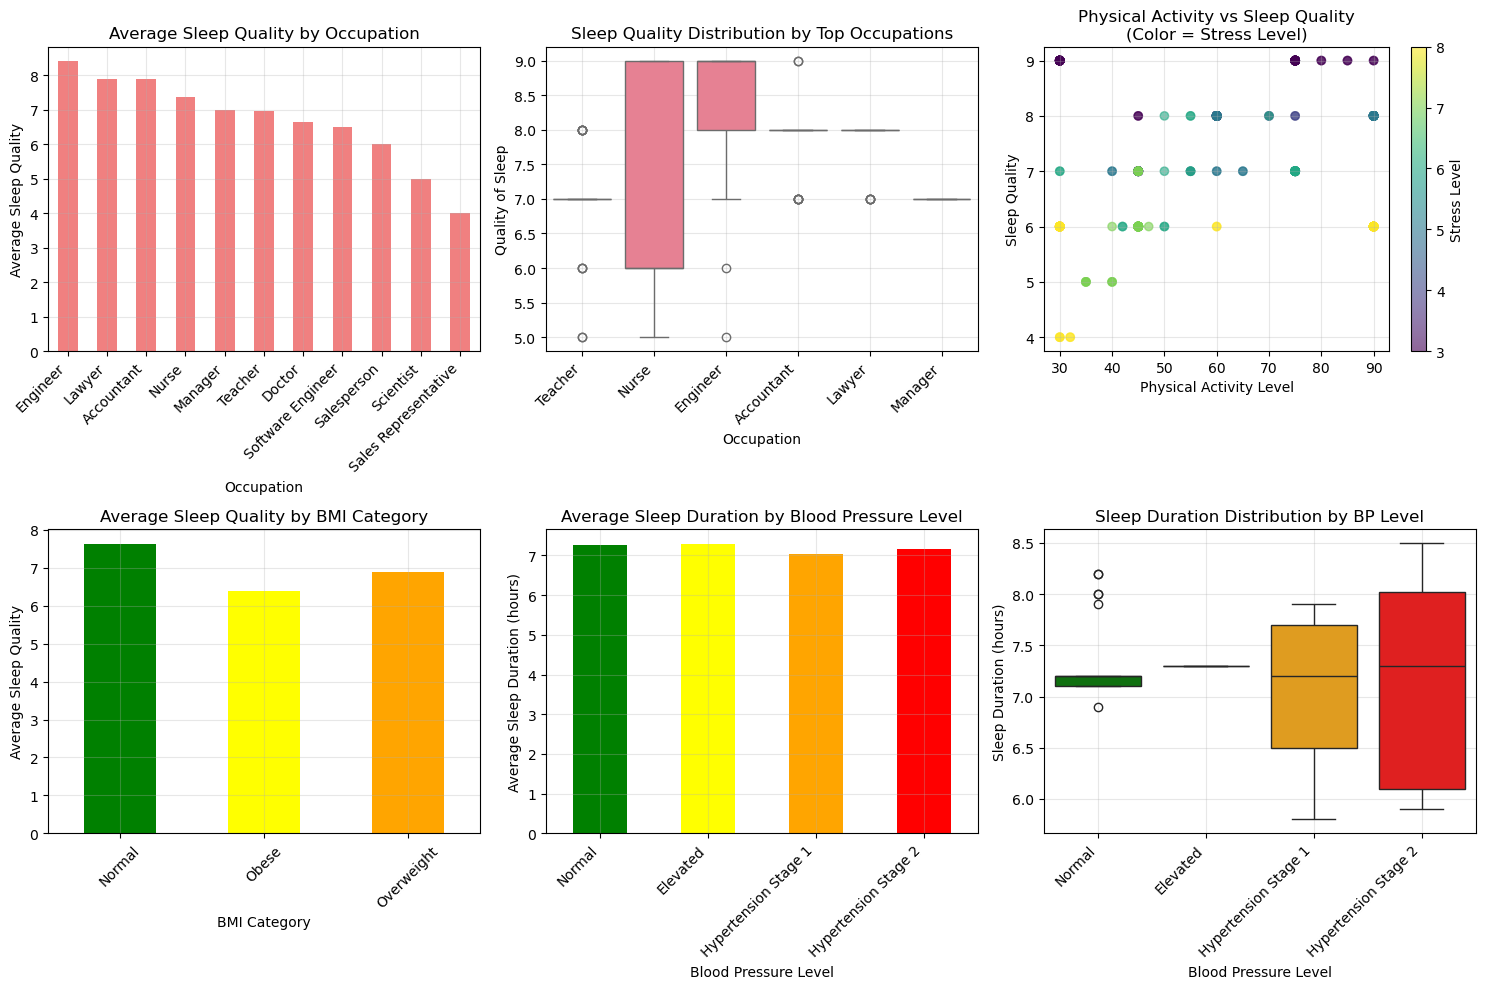

ANOVA F-statistic: 30.0222, p-value: 0.0000

Blood Pressure ANOVA F-statistic: 0.9646, p-value: 0.4095


In [5]:
# Occupation and Sleep Quality Analysis
plt.figure(figsize=(15, 10))

# Top left: Average sleep quality by occupation
plt.subplot(2, 3, 1)
occupation_sleep = df_clean.groupby('Occupation')['Quality of Sleep'].agg(['mean', 'count']).sort_values('mean', ascending=False)
occupation_sleep['mean'].plot(kind='bar', color='lightcoral')
plt.title('Average Sleep Quality by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Top middle: Sleep quality distribution by occupation
plt.subplot(2, 3, 2)
top_occupations = occupation_sleep.head(6).index
df_top_occ = df_clean[df_clean['Occupation'].isin(top_occupations)]
sns.boxplot(data=df_top_occ, x='Occupation', y='Quality of Sleep')
plt.title('Sleep Quality Distribution by Top Occupations')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Top right: Physical activity vs sleep quality
plt.subplot(2, 3, 3)
plt.scatter(df_clean['Physical Activity Level'], df_clean['Quality of Sleep'],
           alpha=0.6, c=df_clean['Stress Level'], cmap='viridis')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Quality')
plt.title('Physical Activity vs Sleep Quality\n(Color = Stress Level)')
plt.colorbar(label='Stress Level')
plt.grid(True, alpha=0.3)

# Bottom left: BMI vs sleep quality
plt.subplot(2, 3, 4)
bmi_sleep = df_clean.groupby('BMI Category')['Quality of Sleep'].mean()
bmi_sleep.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Average Sleep Quality by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Sleep Quality')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Bottom middle: Blood Pressure Level vs Sleep Duration
plt.subplot(2, 3, 5)
bp_order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
bp_sleep = df_clean.groupby('Blood_Pressure_Level')['Sleep Duration'].mean().reindex(bp_order)
bp_sleep.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Average Sleep Duration by Blood Pressure Level')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Bottom right: Box plot showing distribution
plt.subplot(2, 3, 6)
sns.boxplot(data=df_clean, x='Blood_Pressure_Level', y='Sleep Duration', 
            order=bp_order, palette=['green', 'yellow', 'orange', 'red'])
plt.title('Sleep Duration Distribution by BP Level')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical analysis of occupation effects
from scipy.stats import f_oneway

occupations = df_clean['Occupation'].unique()
occupation_groups = [df_clean[df_clean['Occupation'] == occ]['Quality of Sleep'].values
                    for occ in occupations]

f_stat, p_value = f_oneway(*occupation_groups)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

# Statistical analysis for Blood Pressure vs Sleep Duration
bp_groups = [df_clean[df_clean['Blood_Pressure_Level'] == bp]['Sleep Duration'].values
             for bp in bp_order if bp in df_clean['Blood_Pressure_Level'].values]

if len(bp_groups) > 1:
    f_stat_bp, p_value_bp = f_oneway(*bp_groups)
    print(f"\nBlood Pressure ANOVA F-statistic: {f_stat_bp:.4f}, p-value: {p_value_bp:.4f}")